<a href="https://colab.research.google.com/github/Dimiboi1553/Linear-Regression-Model-for-Superconductors/blob/main/Linear_Regression_Model_For_Superconductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch.nn.functional as F

DATASET

--------------------
Contributed by:
Hamidieh,Kam. (2018). Superconductivty Data. UCI Machine Learning Repository. https://doi.org/10.24432/C53P47.

#**PRE-PROCESSING DATA**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Linear Regression Model for Superconductors/train.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [ ]:
du = pd.read_csv("/content/drive/MyDrive/Linear Regression Model for Superconductors/unique_m.csv")
du

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


**DATA PREPERATION**


In [ ]:
y = df['critical_temp'].values
x = df.drop(['critical_temp','number_of_elements'], axis=1).values

duX = du.drop(['critical_temp','material'],axis=1)
duY = du['critical_temp'].values

result_df = pd.concat([df,duX],axis=1)
x = result_df.values

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(17010, 168)

# **CONVERT TO TENSORFLOW FORMAT**

This is more pre-processing data


In [ ]:
np.isnan(x).sum()

0

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Reshape input data to match the Conv1D input shape
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Build the model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(168, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=89, batch_size=32)

# Evaluate the model
loss = model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on validation set: {mse}')
print(f'Mean Absolute Error on validation set: {mae}')
print(f'R^2 score on validation set: {r2}')


Epoch 1/89
532/532 [==============================] - 4s 4ms/step - loss: 308.1875
Epoch 2/89
532/532 [==============================] - 2s 4ms/step - loss: 29.7596
Epoch 3/89
532/532 [==============================] - 2s 4ms/step - loss: 12.2539
Epoch 4/89
532/532 [==============================] - 2s 4ms/step - loss: 8.7688
Epoch 5/89
532/532 [==============================] - 2s 3ms/step - loss: 7.6359
Epoch 6/89
532/532 [==============================] - 2s 3ms/step - loss: 5.8715
Epoch 7/89
532/532 [==============================] - 2s 3ms/step - loss: 5.3251
Epoch 8/89
532/532 [==============================] - 2s 3ms/step - loss: 4.5314
Epoch 9/89
532/532 [==============================] - 2s 3ms/step - loss: 5.0178
Epoch 10/89
532/532 [==============================] - 2s 4ms/step - loss: 3.8230
Epoch 11/89
532/532 [==============================] - 2s 4ms/step - loss: 3.0274
Epoch 12/89
532/532 [==============================] - 2s 4ms/step - loss: 3.6422
Epoch 13/89
532/532 [

133/133 [==============================] - 0s 2ms/step


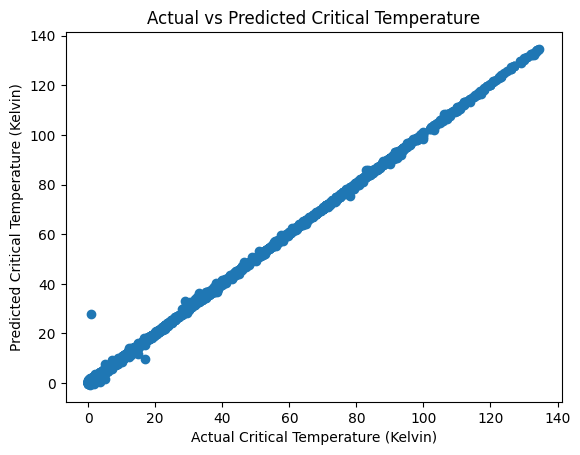

In [ ]:
y_pred = model.predict(x_test)

# Plotting
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Critical Temperature (Kelvin)')
plt.ylabel('Predicted Critical Temperature (Kelvin)')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

In [50]:
import random

# Choose a random index
random_index = random.randint(0, len(x_test) - 1)

# Select a random row from the test set
random_sample = x_test[random_index].reshape(1, x_test.shape[1], 1)

# Get the corresponding actual value
actual_value = y_test[random_index]

# Make a prediction
predicted_value = model.predict(random_sample)[0][0]

# Print the actual and predicted values
print(f"Actual Critical Temperature: {actual_value} Kelvin")
print(f"Predicted Critical Temperature: {predicted_value} Kelvin")


1/1 [==============================] - 0s 25ms/step
Actual Critical Temperature: 56.0 Kelvin
Predicted Critical Temperature: 56.202239990234375 Kelvin
